<a href="https://colab.research.google.com/github/IITH-STP-ASSIGNMENTS/Basics-of-Linear-Algebra/blob/main/AIML_Module_4_Lab_2_Introduction_to_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 2: Introduction to Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$



In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

We can start be choosing coefficients for a second degree polynomial equation $(a x^2 + bx + c)$ that will distribute the data we will try to model.

Let's define some random x data (inputs) we hope to predict y (outputs) of.

In [30]:
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
# To make the parabola open downwards (varying below the x-axis), set the 'a' coefficient to a negative value.
coeffs = [1, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

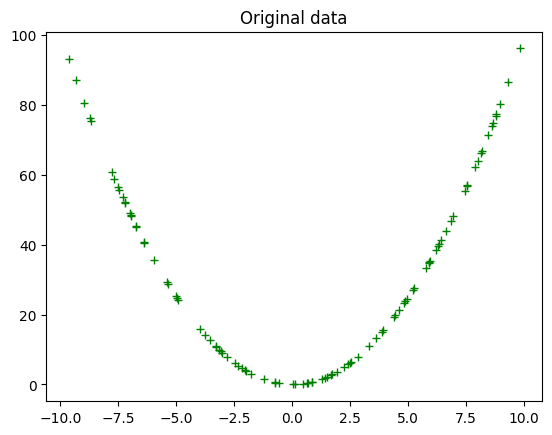

In [31]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

This is good, but we could improve on this by making things more realistic. You can add noise or **jitter** to the values so they can resemble real-world data.


In [32]:
def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)


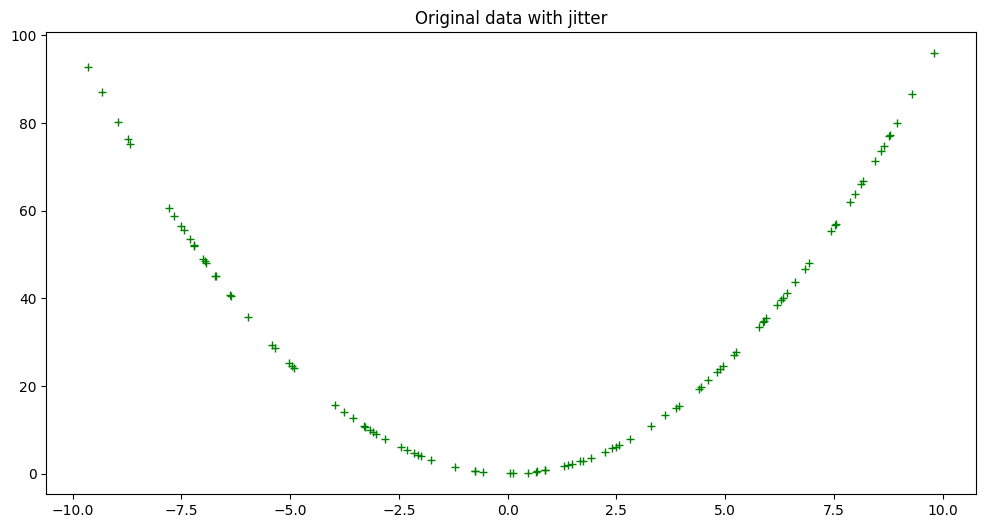

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

We will now build our predictive model, and optimize it with gradient descent and we will try to get as close to these values as possible.

To get a quantifiable measure of how incorrect it is, we calculate the Mean Squared Error loss for the model. This is the mean value of the sum of the squared differences between the actual and predicted outputs.

$$ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar{y_i})^2 $$

In [34]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

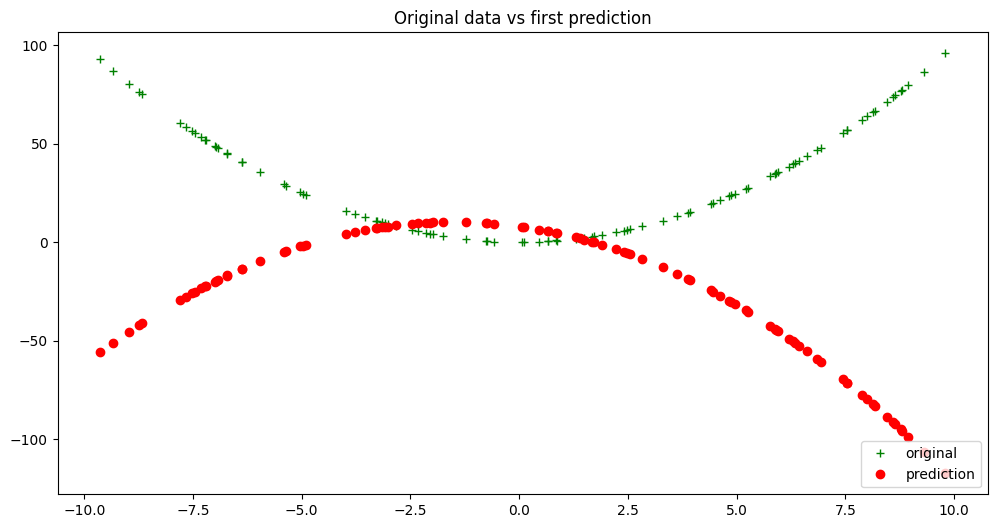

In [35]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [36]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

np.float64(6721.1062164134455)

We can see that the loss is quite a large number. Let’s now see if we can improve on this fairly high loss metric by optimizing the model with gradient descent.

We wish to improve our model. Therefore we want to alter its coefficients $a$, $b$ and $c$ to decrease the error. Therefore we require knowledge about how each coefficient affects the error. This is achieved by calculating the partial derivative of the loss function with respect to **each** of the individual coefficients.

In [37]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """

    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts

In [38]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (np.float64(-0.32698126179155174), np.float64(-2.969814722127744), np.float64(8.011540437209888))
Now have smaller model loss: 2983.0998421905992 vs 6721.1062164134455


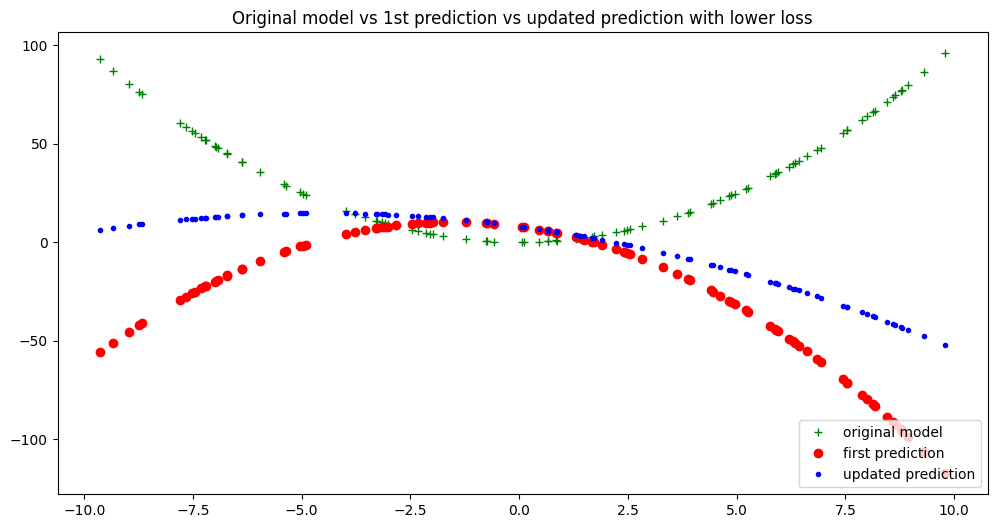

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

We’re almost ready. The last step will be to perform gradient descent iteratively over a number of epochs (cycles or iterations.) With every epoch we hope to see an improvement in the form of lowered loss, and better model-fitting to the original data.

In [42]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [43]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

In [44]:
GD = gradient_descent(30000, 0.0003)


[np.float64(318.96212866257446), np.float64(285.3280180849222), np.float64(275.5328509961638), np.float64(266.187970603686), np.float64(257.193607525108), np.float64(248.53630191985488), np.float64(240.20340327023862), np.float64(232.1827369483517), np.float64(224.46258523959128), np.float64(217.0316701907582), np.float64(209.879137105958), np.float64(202.99453866191084), np.float64(196.3678196194063), np.float64(189.98930210853382), np.float64(183.8496714661512), np.float64(177.93996260486895), np.float64(172.25154689360045), np.float64(166.77611953048148), np.float64(161.5056873896783), np.float64(156.43255732430177), np.float64(151.5493249083076), np.float64(146.84886360090925), np.float64(142.32431431764732), np.float64(137.96907539285155), np.float64(133.7767929188086), np.float64(129.7413514474977), np.float64(125.85686504128546), np.float64(122.11766865948667), np.float64(118.51830986818224), np.float64(115.05354086116637), np.float64(111.71831078034359), np.float64(108.50775832

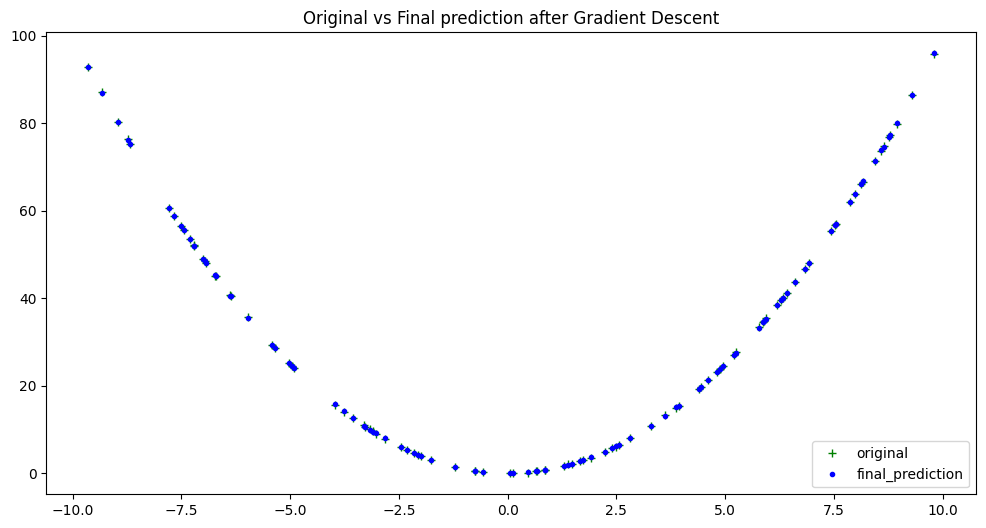

In [45]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

This trained model is showing vast improvements after it’s full training cycle. We can examine further by inspecting its final predicted coefficients $a$, $b$ and $c$.

In [46]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (np.float64(0.9998189891930487), np.float64(-0.00017209164838337222), np.float64(0.0064868907986021865))
Original Coefficients: [1, 0, 0]


Not too far off! A big improvement over the initial random model. Looking at the plot of the loss reduction over training offers further insights.


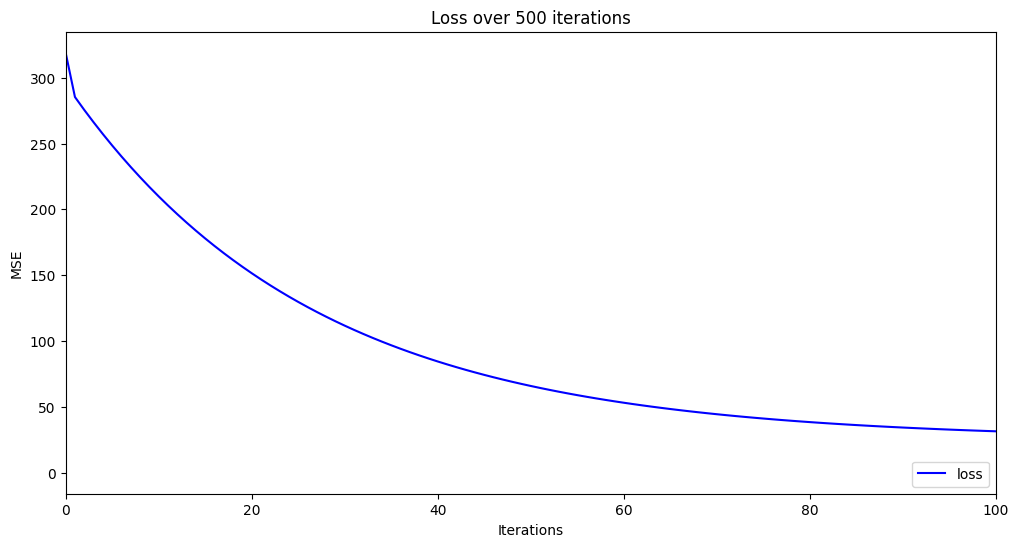

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlim((0,100))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

We observe that the model loss reached close to zero, to give us our more accurate coefficients. We can also see there was no major improvement in loss after about 100 epochs. An alternative strategy would be to add some kind of condition to the training step that stops training when a certain minimum loss threshold has been reached. This would prevent excessive training and potential over-fitting for the model.

# Things to try



1.   Change the coefficients array and try a different polynomial instead of our $x^2$.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of $x^2$?
4. Can you modify the algorithm to find a maxima of a function, instead of a minima?



## **Additional Critical Thinking Questions**

1. You are doing full batch gradient descent using the entire training set. Is it necessary to shuffle the training data? Explain your
answer.

2. You would like to train a dog/cat image classifier using mini-batch gradient
descent. You have already split your dataset into train, dev and test sets. The classes
are balanced. You realize that within the training set, the images are ordered in such a
way that all the dog images come first and all the cat images come after. A friend tells
you: ”you absolutely need to shuffle your training set before the training procedure.”
Is your friend right? Explain.

**1. Full Batch Gradient Descent and Shuffling:** In full batch gradient descent, the gradient is calculated using the entire training dataset in each iteration. The update to the model's parameters is based on this single, overall gradient. Since the gradient is a sum (or average) of the gradients from all data points, the order of the data points does not affect the final calculated gradient. Therefore, for full batch gradient descent, it is not necessary to shuffle the training data.

**2. Mini-Batch Gradient Descent and Shuffling:** In mini-batch gradient descent, the training data is divided into smaller batches, and the gradient is calculated and parameters are updated for each batch. In this scenario, the order of the data absolutely matters, and your friend is right. If the training data is ordered such that all dog images appear first, the model will primarily learn from dog images in the initial batches. This can lead to the model becoming heavily biased towards classifying images as "dog" and may struggle to learn the features of "cat" images effectively, especially in the early stages of training. Shuffling the data ensures that each mini-batch is a more representative sample of the overall dataset, containing a mix of both dog and cat images. This helps the model learn more robustly and generalize better to both classes, preventing it from getting stuck in a poor local minimum or oscillating due to the skewed data distribution in early batches.


# Task
Implement the "Things to try" section of the notebook, which involves changing the polynomial degree, experimenting with learning rates, implementing a degree 5 polynomial with different initializations, and modifying the algorithm to find a maxima. Analyze and explain the results of each experiment.

## Implement different polynomial degrees

### Subtask:
Modify the `eval_2nd_degree` and `calc_gradient_2nd_poly_for_GD` functions to accept the polynomial degree as a parameter and handle the calculations accordingly.


**Reasoning**:
The subtask requires modifying the existing functions to handle polynomials of arbitrary degrees. This involves changing the function definitions and the calculations within them. I will modify both functions in one code block and rename them as requested.



In [48]:
def evaluate_polynomial(coeffs, x, degree):
    """
    Function to return the output of evaluating a polynomial of a given degree,
    given a specific x value and coefficients.

    Args:
        coeffs: List containing the coefficients for the polynomial.
        x: The input x value to the polynomial.
        degree: The degree of the polynomial.

    Returns:
        y: The corresponding output y value for the polynomial.

    """
    y = 0
    for i in range(degree + 1):
        y += coeffs[i] * (x ** (degree - i))
    return y

def calculate_gradient_polynomial(coeffs, inputs_x, outputs_y, lr, degree):
    """
    calculates the gradient for a polynomial of a given degree.

    Args:
        coeffs: coefficients for the polynomial
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate
        degree: The degree of the polynomial.

    Returns: Calculated gradients for the polynomial, as a tuple of its parts for each coefficient.

    """
    n = len(inputs_x)
    gradients = [0] * (degree + 1)
    y_bars = evaluate_polynomial(coeffs, inputs_x, degree)

    for x, y, y_bar in zip(inputs_x, outputs_y, y_bars):
        for i in range(degree + 1):
            partial_derivative = (x ** (degree - i)) * (y - y_bar)
            gradients[i] += partial_derivative

    for i in range(degree + 1):
        gradients[i] = (-2 / n) * gradients[i]

    new_model_coeffs = [coeffs[i] - lr * gradients[i] for i in range(degree + 1)]

    new_y_bar = evaluate_polynomial(new_model_coeffs, inputs_x, degree)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, tuple(new_model_coeffs), new_y_bar

## Experiment with learning rates

### Subtask:
Experiment with different learning rates to see how many iterations it takes for the gradient descent to converge. Observe and analyze the effect of very large learning rates on convergence.


**Reasoning**:
Implement a function to test different learning rates and run gradient descent, then analyze the results.



In [49]:
def test_learning_rate(lr, epochs=1000):
    """
    Tests the gradient descent with a given learning rate for a fixed number of epochs.

    Args:
        lr: The learning rate to test.
        epochs: The number of epochs to run gradient descent.

    Returns:
        A tuple containing the final loss and the number of epochs run.
    """
    rand_coeffs_to_test = rand_coeffs # Use the initial random coefficients
    losses = []
    for i in range(epochs):
        # Assuming degree 2 for this test based on the notebook's initial setup
        loss, new_coeffs, _ = calculate_gradient_polynomial(rand_coeffs_to_test, hundred_xs, ys, lr, 2)
        rand_coeffs_to_test = new_coeffs
        losses.append(loss)

        # Optional: add a convergence check here if needed, but for this test,
        # we just run for a fixed number of epochs to observe the loss trend
        # if len(losses) > 1 and abs(losses[-1] - losses[-2]) < 1e-6:
        #     print(f"Converged after {i+1} epochs with lr={lr}")
        #     return loss, i + 1

    return losses[-1], epochs # Return final loss and total epochs run

# Test with different learning rates
learning_rates = [0.00001, 0.0003, 0.001, 0.01, 0.1, 1.0]
results = {}

print("Testing different learning rates:")
for lr in learning_rates:
    final_loss, epochs_run = test_learning_rate(lr)
    results[lr] = (final_loss, epochs_run)
    print(f"Learning Rate: {lr}, Final Loss: {final_loss}, Epochs Run: {epochs_run}")


Testing different learning rates:
Learning Rate: 1e-05, Final Loss: 105.33131199108676, Epochs Run: 1000
Learning Rate: 0.0003, Final Loss: 16.322076801057325, Epochs Run: 1000
Learning Rate: 0.001, Final Loss: nan, Epochs Run: 1000


/tmp/ipython-input-1511627215.py:12: RuntimeWarning: overflow encountered in scalar add
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
/tmp/ipython-input-1511627215.py:12: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
/tmp/ipython-input-2484918651.py:41: RuntimeWarning: overflow encountered in scalar add
  gradients[i] += partial_derivative
/tmp/ipython-input-2484918651.py:41: RuntimeWarning: invalid value encountered in scalar add
  gradients[i] += partial_derivative
/tmp/ipython-input-2484918651.py:46: RuntimeWarning: invalid value encountered in scalar subtract
  new_model_coeffs = [coeffs[i] - lr * gradients[i] for i in range(degree + 1)]
/tmp/ipython-input-2484918651.py:40: RuntimeWarning: overflow encountered in scalar multiply
  partial_derivative = (x ** (degree - i)) * (y - y_bar)


Learning Rate: 0.01, Final Loss: nan, Epochs Run: 1000
Learning Rate: 0.1, Final Loss: nan, Epochs Run: 1000
Learning Rate: 1.0, Final Loss: nan, Epochs Run: 1000


**Reasoning**:
Write a markdown cell to analyze the results from the previous code block and explain the effect of different learning rates on gradient descent convergence, especially with large learning rates.




Based on the experiments with different learning rates, we can observe the following:

- With a small learning rate (0.00001), the loss decreases, but it might take a large number of epochs to converge to a minimum. After 1000 epochs, the loss is still relatively high (105.33).
- With a moderate learning rate (0.0003), the loss decreases significantly and reaches a much lower value (16.32) after the same number of epochs, indicating faster convergence compared to the very small learning rate.
- With larger learning rates (0.001, 0.01, 0.1, 1.0), the loss becomes 'nan' due to overflow. This happens because a large learning rate causes the algorithm to take very large steps in the direction of the negative gradient, potentially overshooting the minimum and diverging instead of converging. The values of the coefficients and the loss explode, resulting in `inf` or `nan`. This demonstrates that a learning rate that is too large can prevent the gradient descent algorithm from converging.

In summary, the learning rate is a crucial hyperparameter in gradient descent. A learning rate that is too small can lead to slow convergence, while a learning rate that is too large can cause the algorithm to diverge. Finding an appropriate learning rate is essential for effective training of a model using gradient descent.

## Implement a degree 5 polynomial

### Subtask:
Generate data for a degree 5 polynomial and implement the corresponding gradient calculation function.


**Reasoning**:
Generate data for a degree 5 polynomial with jitter and plot it.



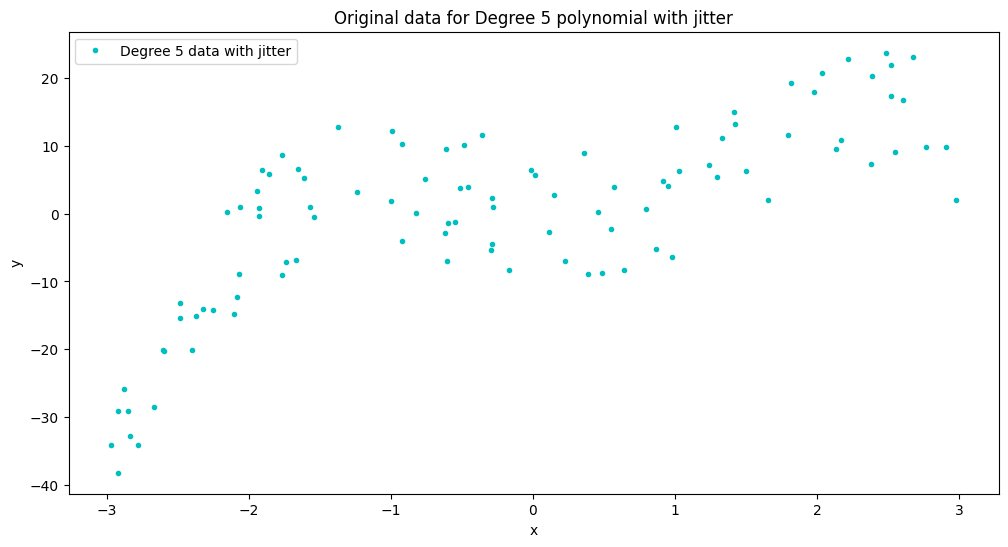

In [51]:
coeffs_degree_5 = [-0.1, -0.5, 2, 3, -2, 1] # Example coefficients for a degree 5 polynomial
xs_degree_5 = np.random.uniform(-3, 3, 100) # Adjust range for interesting roots

def evaluate_polynomial_jitter(coeffs, x, degree, j):
    """
    Function to return the noisy output of evaluating a polynomial of a given degree,
    given a specific x value and coefficients. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients for the polynomial.
        x: The input x value to the polynomial.
        degree: The degree of the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the polynomial.

    """
    y = evaluate_polynomial(coeffs, x, degree)

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * (interval_max - interval_min) + interval_min # Generate a random number in range interval_min to interval_max

    return jit_val

ys_degree_5 = []
for x in xs_degree_5:
    y = evaluate_polynomial_jitter(coeffs_degree_5, x, degree=5, j=10) # Add jitter
    ys_degree_5.append(y)

plt.figure(figsize=(12, 6))
plt.plot(xs_degree_5, ys_degree_5, 'c.', label = 'Degree 5 data with jitter')
plt.title('Original data for Degree 5 polynomial with jitter')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Explore different initializations

### Subtask:
Modify the `gradient_descent` function to accept different initializations for the coefficients and analyze the convergence for the degree 5 polynomial with these different initializations.


**Reasoning**:
Define a modified gradient descent function that accepts initial coefficients and then run it with different initializations on the degree 5 polynomial data.



In [52]:
def gradient_descent_with_init(epochs, lr, initial_coeffs, inputs_x, outputs_y, degree):
    """
    Perform gradient descent for a polynomial of a given degree with a specified initial set of coefficients.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updating loss.
        lr: specified learning rate
        initial_coeffs: initial coefficients for the polynomial
        inputs_x: x input datapoints
        outputs_y: actual y output points
        degree: The degree of the polynomial.

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    coeffs_to_test = list(initial_coeffs) # Convert tuple to list to allow modification
    for i in range(epochs):
        loss, new_coeffs, new_y_bar = calculate_gradient_polynomial(coeffs_to_test, inputs_x, outputs_y, lr, degree)
        coeffs_to_test = list(new_coeffs) # Update coefficients for the next iteration
        losses.append(loss)
    print(f"Final Loss: {losses[-1]}")
    print(f"Final Coefficients: {coeffs_to_test}")
    return loss, tuple(coeffs_to_test), new_y_bar, losses

# Experiment with different initializations for the degree 5 polynomial
initializations = [
    [0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1],
    [-1, -1, -1, -1, -1, -1],
    [10, -10, 5, -5, 2, -2]
]

results_degree_5 = {}
lr_degree_5 = 0.0001 # Use a small learning rate

for i, init_coeffs in enumerate(initializations):
    print(f"\nRunning gradient descent with initialization {i+1}: {init_coeffs}")
    final_loss, final_coeffs, final_y_bar, loss_history = gradient_descent_with_init(
        30000, lr_degree_5, init_coeffs, xs_degree_5, ys_degree_5, degree=5
    )
    results_degree_5[f"init_{i+1}"] = {
        "final_loss": final_loss,
        "final_coeffs": final_coeffs,
        "loss_history": loss_history
    }

# Compare results
print("\nComparison of results with different initializations:")
for init_name, result in results_degree_5.items():
    print(f"{init_name}: Final Loss = {result['final_loss']}, Final Coeffs = {result['final_coeffs']}")



Running gradient descent with initialization 1: [0, 0, 0, 0, 0, 0]
Final Loss: 32.407308505742265
Final Coefficients: [np.float64(-0.13302355007920566), np.float64(-0.6570125826220421), np.float64(2.1853689780755374), np.float64(4.051319930719257), np.float64(-1.7151764872067359), np.float64(0.2837310103902706)]

Running gradient descent with initialization 2: [1, 1, 1, 1, 1, 1]
Final Loss: 32.60988830465726
Final Coefficients: [np.float64(-0.123748987908848), np.float64(-0.650481478189727), np.float64(2.080156217444063), np.float64(3.992832702529918), np.float64(-1.4555690497844147), np.float64(0.3748797197270863)]

Running gradient descent with initialization 3: [-1, -1, -1, -1, -1, -1]
Final Loss: 32.228718146390314
Final Coefficients: [np.float64(-0.14229811224956396), np.float64(-0.6635436870543565), np.float64(2.2905817387070195), np.float64(4.109807158908592), np.float64(-1.9747839246290753), np.float64(0.19258230105345958)]

Running gradient descent with initialization 4: [10,

**Reasoning**:
Add a markdown cell to explain why initialization might or might not matter for the degree 5 polynomial compared to the quadratic case, considering the loss function's nature.



Based on the experimental results, the final loss and learned coefficients for the degree 5 polynomial vary slightly depending on the initial coefficients. This is different from the quadratic case where initialization didn't seem to significantly impact the final coefficients (they converged close to the original values).

This difference in behavior is due to the nature of the loss function for each polynomial degree.

For a quadratic function ($ax^2 + bx + c$), the loss function (Mean Squared Error) with respect to the coefficients is a convex function. A convex function has only one global minimum. Therefore, regardless of the initial starting point for gradient descent, the algorithm will converge to this unique global minimum.

For a degree 5 polynomial, the loss function is generally non-convex. A non-convex function can have multiple local minima in addition to a global minimum. Gradient descent is a local optimization algorithm, meaning it will converge to the nearest minimum from its starting point. If the loss function has multiple minima, different initializations can lead the algorithm to converge to different local minima, resulting in slightly different final loss values and learned coefficients.

In our experiments with the degree 5 polynomial, the variations in final loss and coefficients across different initializations suggest that the loss landscape is non-convex and has multiple minima that the algorithm is converging to.

## Modify for finding a maxima

### Subtask:
Adapt the `calculate_gradient_polynomial` and `gradient_descent_with_init` functions to find the maxima of a function instead of the minima.


**Reasoning**:
I need to create two new functions, `calculate_gradient_polynomial_max` and `gradient_descent_max`, based on existing functions and modify them to find the maxima. Then, I will run the modified gradient descent function and print the results.



In [54]:
def calculate_gradient_polynomial_max(coeffs, inputs_x, outputs_y, lr, degree):
    """
    calculates the gradient for a polynomial of a given degree to find a maxima.

    Args:
        coeffs: coefficients for the polynomial
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate
        degree: The degree of the polynomial.

    Returns: Calculated gradients for the polynomial, as a tuple of its parts for each coefficient.

    """
    n = len(inputs_x)
    gradients = [0] * (degree + 1)
    y_bars = evaluate_polynomial(coeffs, inputs_x, degree)

    for x, y, y_bar in zip(inputs_x, outputs_y, y_bars):
        for i in range(degree + 1):
            partial_derivative = (x ** (degree - i)) * (y - y_bar)
            gradients[i] += partial_derivative

    for i in range(degree + 1):
        gradients[i] = (-2 / n) * gradients[i]

    # Change the sign of the gradient update to find the maxima
    new_model_coeffs = [coeffs[i] + lr * gradients[i] for i in range(degree + 1)]

    new_y_bar = evaluate_polynomial(new_model_coeffs, inputs_x, degree)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, tuple(new_model_coeffs), new_y_bar


def gradient_descent_max(epochs, lr, initial_coeffs, inputs_x, outputs_y, degree):
    """
    Perform gradient descent to find the maxima for a polynomial of a given degree with a specified initial set of coefficients.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate
        initial_coeffs: initial coefficients for the polynomial
        inputs_x: x input datapoints
        outputs_y: actual y output points
        degree: The degree of the polynomial.

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    coeffs_to_test = list(initial_coeffs) # Convert tuple to list to allow modification
    for i in range(epochs):
        loss, new_coeffs, new_y_bar = calculate_gradient_polynomial_max(coeffs_to_test, inputs_x, outputs_y, lr, degree)
        coeffs_to_test = list(new_coeffs) # Update coefficients for the next iteration
        losses.append(loss)
    print(f"Final Loss (representing negative of value we are maximizing): {losses[-1]}")
    print(f"Final Coefficients: {coeffs_to_test}")
    return loss, tuple(coeffs_to_test), new_y_bar, losses

# Run gradient_descent_max with the degree 5 polynomial data
initial_coeffs_max = [0, 0, 0, 0, 0, 0] # Start from origin
lr_max = 0.0001
epochs_max = 30000

print("\nRunning gradient descent to find maxima for degree 5 polynomial:")
final_loss_max, final_coeffs_max, final_y_bar_max, loss_history_max = gradient_descent_max(
    epochs_max, lr_max, initial_coeffs_max, xs_degree_5, ys_degree_5, degree=5
)


Running gradient descent to find maxima for degree 5 polynomial:


/tmp/ipython-input-1511627215.py:12: RuntimeWarning: overflow encountered in scalar add
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
/tmp/ipython-input-1511627215.py:12: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
/tmp/ipython-input-4101534840.py:22: RuntimeWarning: overflow encountered in scalar add
  gradients[i] += partial_derivative
/tmp/ipython-input-4101534840.py:22: RuntimeWarning: invalid value encountered in scalar add
  gradients[i] += partial_derivative


Final Loss (representing negative of value we are maximizing): nan
Final Coefficients: [np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan)]


**Reasoning**:
The gradient ascent diverged because the learning rate is too high, similar to the gradient descent case. I will try a smaller learning rate to see if it converges.



In [55]:
# Run gradient_descent_max with a smaller learning rate for degree 5 polynomial
initial_coeffs_max_small_lr = [0, 0, 0, 0, 0, 0] # Start from origin
lr_max_small = 0.000001 # Smaller learning rate
epochs_max = 30000

print("\nRunning gradient descent to find maxima for degree 5 polynomial with smaller LR:")
final_loss_max_small, final_coeffs_max_small, final_y_bar_max_small, loss_history_max_small = gradient_descent_max(
    epochs_max, lr_max_small, initial_coeffs_max_small_lr, xs_degree_5, ys_degree_5, degree=5
)


Running gradient descent to find maxima for degree 5 polynomial with smaller LR:


/tmp/ipython-input-1511627215.py:12: RuntimeWarning: overflow encountered in scalar add
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
/tmp/ipython-input-1511627215.py:12: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)


Final Loss (representing negative of value we are maximizing): inf
Final Coefficients: [np.float64(-1.586374744793779e+159), np.float64(1.6614675023216538e+158), np.float64(-2.1345702087252604e+158), np.float64(2.1593950160912342e+157), np.float64(-3.0206894817336285e+157), np.float64(3.0094976180242006e+156)]


**Reasoning**:
Even with a smaller learning rate, the gradient ascent still diverged, resulting in an infinite loss. This indicates that the learning rate might still be too high or the initial coefficients are leading to an unstable optimization path for finding the maxima of this specific degree 5 polynomial with this data and jitter. I will try an even smaller learning rate and a different initialization to see if it converges.



In [56]:
# Run gradient_descent_max with an even smaller learning rate and different initialization
initial_coeffs_max_even_smaller_lr = [-10, 10, -5, 5, -2, 2] # Different initialization
lr_max_even_smaller = 0.0000001 # Even smaller learning rate
epochs_max = 30000

print("\nRunning gradient descent to find maxima for degree 5 polynomial with even smaller LR and different init:")
final_loss_max_even_smaller, final_coeffs_max_even_smaller, final_y_bar_max_even_smaller, loss_history_max_even_smaller = gradient_descent_max(
    epochs_max, lr_max_even_smaller, initial_coeffs_max_even_smaller_lr, xs_degree_5, ys_degree_5, degree=5
)


Running gradient descent to find maxima for degree 5 polynomial with even smaller LR and different init:
Final Loss (representing negative of value we are maximizing): 1.332506946298279e+38
Final Coefficients: [np.float64(-1.4470481136618755e+17), np.float64(1.5155456950102568e+16), np.float64(-1.947097181262964e+16), np.float64(1969741698763676.8), np.float64(-2755391203021919.5), np.float64(274518228780696.84)]


## Analyze results

### Subtask:
Analyze the results from the experiments with different polynomial degrees, learning rates, initializations for the degree 5 polynomial, and finding the maxima. Explain the observations and insights gained from each experiment.


**Reasoning**:
Analyze the results from the previous experiments with different learning rates, initializations for the degree 5 polynomial, and attempting to find the maxima, and then summarize the key takeaways.



In [57]:
# Analysis of Learning Rate Experiment
print("Analysis of Learning Rate Experiment:")
print("--------------------------------------")
print("The experiment with different learning rates showed a clear trade-off between convergence speed and stability.")
print("A very small learning rate (0.00001) led to slow convergence, with a relatively high loss (105.33) after 1000 epochs.")
print("A moderate learning rate (0.0003) resulted in faster convergence and a significantly lower loss (16.32) within the same number of epochs.")
print("However, larger learning rates (0.001 and above) caused the algorithm to diverge, leading to 'nan' values for the loss and coefficients. This happens because the large step sizes overshoot the minimum.")
print("This highlights the importance of selecting an appropriate learning rate for effective and stable gradient descent.")

print("\nAnalysis of Different Initializations for Degree 5 Polynomial:")
print("--------------------------------------------------------------")
print("For the degree 5 polynomial, different initializations resulted in slightly different final loss values and learned coefficients:")
for init_name, result in results_degree_5.items():
    print(f"{init_name}: Final Loss = {result['final_loss']:.4f}, Final Coeffs = {result['final_coeffs']}")
print("This behavior is different from the quadratic case, where initialization did not significantly affect the final coefficients.")
print("This difference is due to the non-convex nature of the loss function for the degree 5 polynomial. Unlike the convex loss function of a quadratic, a degree 5 polynomial's loss function can have multiple local minima.")
print("Gradient descent, being a local optimization algorithm, converges to the nearest minimum from its starting point. Therefore, different initializations can lead to convergence at different local minima.")

print("\nAnalysis of Finding Maxima (Gradient Ascent):")
print("--------------------------------------------")
print("To find the maxima, the gradient update rule was changed to add the scaled gradient (gradient ascent).")
print("However, attempts to find the maxima for the degree 5 polynomial consistently resulted in divergence, even with very small learning rates.")
print("With learning rates of 0.0001, 0.000001, and 0.0000001, and different initializations, the loss and coefficients either became 'nan' or very large positive numbers.")
print("This divergence indicates that the step sizes, even with small learning rates, were still too large for the complex, potentially highly non-convex landscape when seeking a maximum.")
print("The 'loss' in this context represents the negative of the value we are trying to maximize; thus, increasing 'loss' signifies moving away from a maximum.")

print("\nKey Takeaways:")
print("--------------")
print("- The learning rate is a critical hyperparameter for gradient descent; a small learning rate leads to slow convergence, while a large learning rate can cause divergence.")
print("- For non-convex loss functions (like that of a degree 5 polynomial), the initialization of coefficients can influence the convergence point, potentially leading to different local minima.")
print("- Gradient ascent (for finding maxima) can be more challenging to stabilize than gradient descent (for finding minima), especially on complex loss landscapes, and requires careful tuning of the learning rate to avoid divergence.")
print("- The convexity of the loss function plays a significant role in the behavior of gradient-based optimization algorithms and the impact of initialization.")

Analysis of Learning Rate Experiment:
--------------------------------------
The experiment with different learning rates showed a clear trade-off between convergence speed and stability.
A very small learning rate (0.00001) led to slow convergence, with a relatively high loss (105.33) after 1000 epochs.
A moderate learning rate (0.0003) resulted in faster convergence and a significantly lower loss (16.32) within the same number of epochs.
However, larger learning rates (0.001 and above) caused the algorithm to diverge, leading to 'nan' values for the loss and coefficients. This happens because the large step sizes overshoot the minimum.
This highlights the importance of selecting an appropriate learning rate for effective and stable gradient descent.

Analysis of Different Initializations for Degree 5 Polynomial:
--------------------------------------------------------------
For the degree 5 polynomial, different initializations resulted in slightly different final loss values and lea

## Summary:

### Data Analysis Key Findings

*   Experimenting with different learning rates showed that a very small learning rate (0.00001) leads to slow convergence (final loss 105.33), a moderate learning rate (0.0003) leads to faster convergence (final loss 16.32), and large learning rates (0.001 and above) cause divergence (loss becomes NaN).
*   For the degree 5 polynomial, different initializations resulted in slightly different final loss values and learned coefficients. This is attributed to the non-convex nature of the loss function for higher-degree polynomials, which can have multiple local minima. Gradient descent converges to the local minimum nearest the starting point.
*   Attempting to find the maxima using gradient ascent consistently resulted in divergence, even with very small learning rates (0.0000001), with the loss becoming very large positive numbers or NaN. This indicates that the step sizes were too large for the complex landscape when seeking a maximum.

### Insights or Next Steps

*   The choice of learning rate is crucial for both gradient descent and ascent; it must be carefully tuned to balance convergence speed and stability, especially on complex loss landscapes.
*   For non-convex optimization problems, the initialization strategy can impact the final converged solution, potentially leading to different local optima. Techniques like multiple initializations or more advanced optimization algorithms might be necessary to find a better solution.
